In [206]:
# ----Import libraries
 
import numpy as np
import pandas as pd
import mygene
import seaborn as sns
import matplotlib.pyplot as plt
import tspex


exp = pd.read_csv('https://storage.googleapis.com/gtex_analysis_v8/rna_seq_data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct.gz', sep='\t', skiprows=2, index_col='Description')
exp.drop(columns = 'Name', inplace = True)


In [207]:
exp = exp[['Brain - Amygdala',
       'Brain - Anterior cingulate cortex (BA24)',
       'Brain - Caudate (basal ganglia)', 'Brain - Cerebellar Hemisphere',
       'Brain - Cerebellum', 'Brain - Cortex', 'Brain - Frontal Cortex (BA9)',
       'Brain - Hippocampus', 'Brain - Hypothalamus',
       'Brain - Nucleus accumbens (basal ganglia)',
       'Brain - Putamen (basal ganglia)', 'Brain - Spinal cord (cervical c-1)',
       'Brain - Substantia nigra']]

In [208]:
genes = pd.read_csv('processed_data/psychiatric_gene_clusters.csv', index_col = 0)
#genes = genes[genes['cluster2129']==1.0]

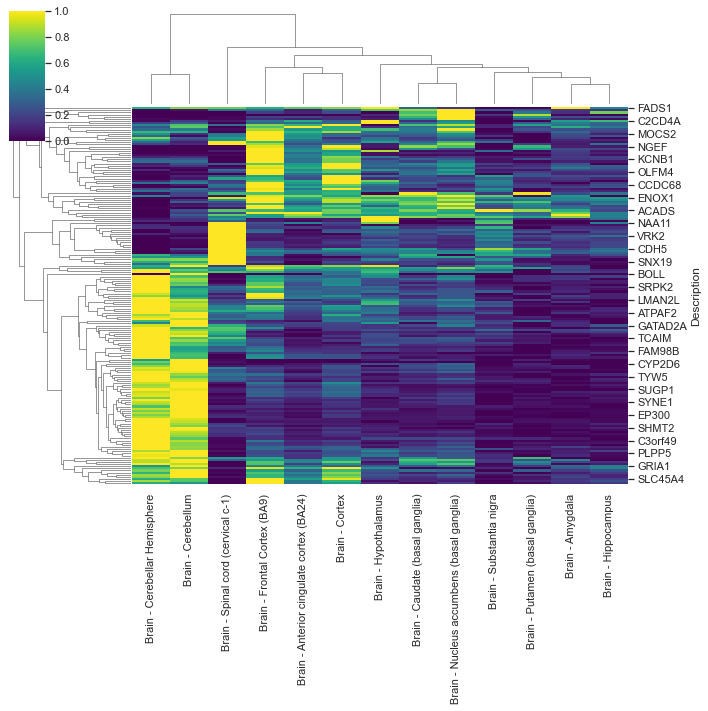

In [209]:
# ---- Visualise heatmap with data scaled per gene

df = exp.loc[list(genes.drop(['RGS5','GSDME', 'BABAM2', 'BORCS7-ASMT', 'HSPE1-MOB4', 'HYI', 'MRTFB', 'PHETA2', 'SNORC'], axis = 0).index.unique())]
#df = exp.loc[list(genes.drop(['GSDME'], axis = 0).index.unique())]
sns.clustermap(df, cmap='viridis', standard_scale=0)
plt.savefig('plots/04-psychiatric_specificity_GTEx/GTEx_expression_gene_clusters.png', dpi=300)
plt.show()

<AxesSubplot:ylabel='Description'>

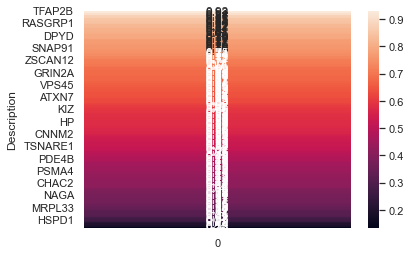

In [210]:
import tspex
# ---- Calculate tau statistic: Which genes are tissue specific? 

tso = tspex.TissueSpecificity(df.loc[df.index.unique()], 'tau', log=False)
sns.heatmap(tso.tissue_specificity.to_frame().sort_values(by=0, ascending = False), annot = True) 


<AxesSubplot:ylabel='Description'>

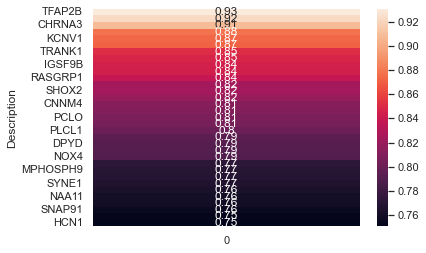

In [216]:
sns.heatmap(tso.tissue_specificity.to_frame()[tso.tissue_specificity.to_frame()[0]>0.75].sort_values(by=0, ascending = False), annot = True) 

<Figure size 2160x720 with 0 Axes>

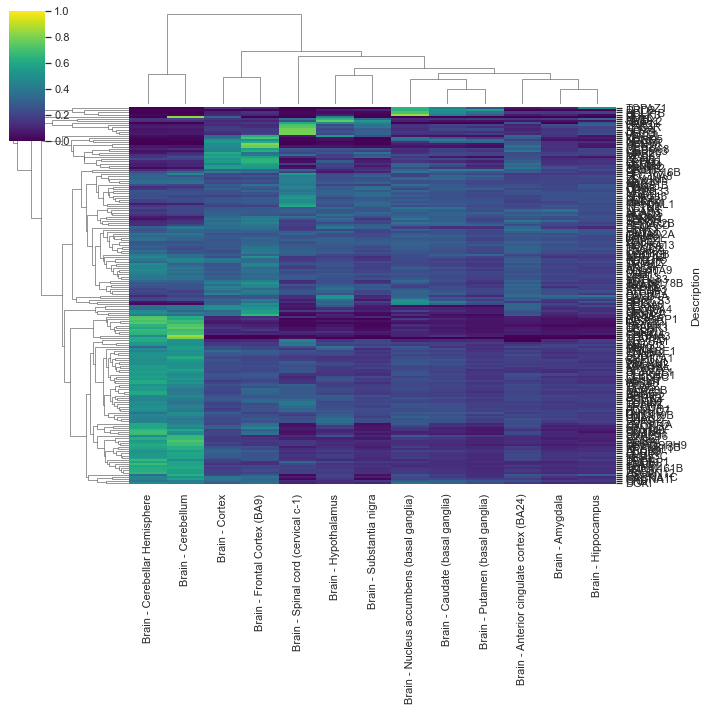

In [219]:
# ---- Calculate SPM statistic: Which tissues are the genes specific in?
from matplotlib.pyplot import figure
sns.set(font_scale=1)

spm = tspex.TissueSpecificity(df, 'spm', log = False)
#figure(figsize=(30, 15), dpi=80)
plt.figure(figsize=(30,10))
sns.clustermap(spm.tissue_specificity, cmap='viridis', yticklabels = True, vmax = 1.0)
plt.show()

In [198]:
genes = pd.read_csv('processed_data/psychiatric_network.csv', index_col = 0)
#genes = genes.reset_index(0).drop(['SLURP2'], axis = 0)


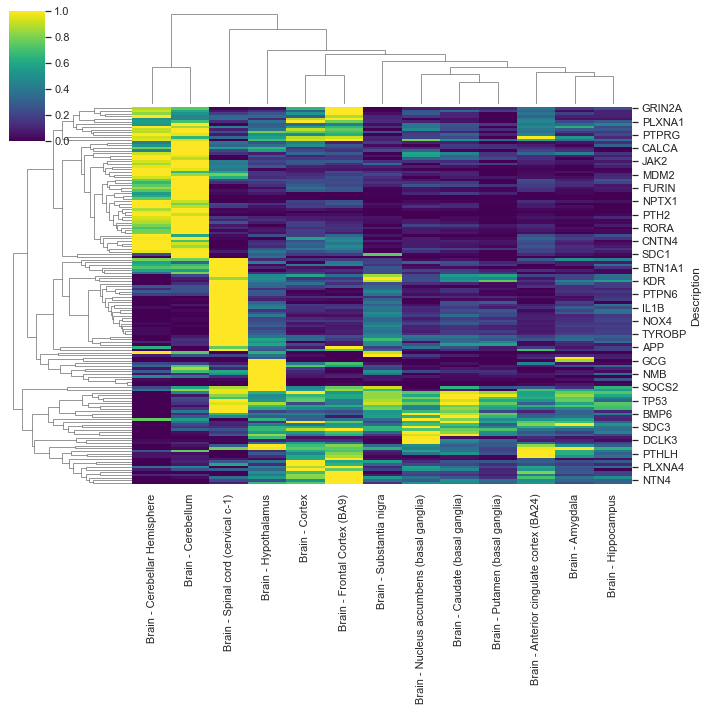

In [204]:
import tspex

# ---- Visualise heatmap with data scaled per gene

df = exp.loc[list(pd.DataFrame(genes).drop(['SLURP2'], axis = 0).index.unique())]
df.drop_duplicates(keep = False, inplace = True)
#df = exp.loc[list(genes.drop(['GSDME'], axis = 0).index.unique())]
sns.clustermap(df, cmap='viridis', standard_scale=0)
#plt.savefig('GTEx_expression_tgts_scaled.png', dpi=300)
plt.show()


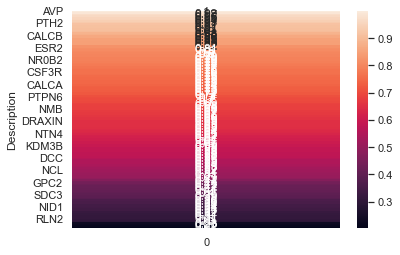

<Figure size 2160x720 with 0 Axes>

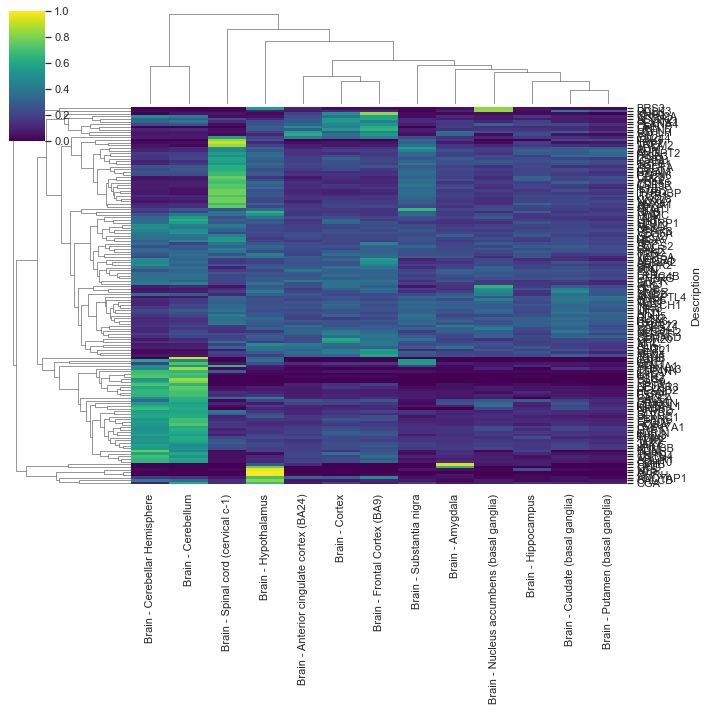

In [205]:

# ---- Calculate tau statistic: Which genes are tissue specific? 

tso = tspex.TissueSpecificity(df.loc[df.index.unique()], 'tau', log=False)
sns.heatmap(tso.tissue_specificity.to_frame().sort_values(by=0, ascending = False), annot = True) 

# ---- Calculate SPM statistic: Which tissues are the genes specific in?
from matplotlib.pyplot import figure
sns.set(font_scale=1)

spm = tspex.TissueSpecificity(df, 'spm', log = False)
#figure(figsize=(30, 15), dpi=80)
plt.figure(figsize=(30,10))
sns.clustermap(spm.tissue_specificity, cmap='viridis', yticklabels = True)
plt.show()
